# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN-12"
COLLABORATORS = "Anna Staniszewska, Zuzanna Słobodzian, Rafał Żegleń"

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [21]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [23]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):    
    expected_value = intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    n = np.random.poisson(expected_value)
   
    x = np.random.uniform(x_lim[0],x_lim[1],n)
    y = np.random.uniform(y_lim[0],y_lim[1],n)
    
    array = pd.DataFrame(data={"X":x.flatten(), "Y":y.flatten()})
    
    return array


    
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):

    def temp(x):
        return -f(x[0], x[1])
    
    intensity_max = -sp.optimize.minimize(temp, [(x_lim[0]+x_lim[1])/2, (y_lim[0]+y_lim[1])/2], bounds = [x_lim, y_lim]).fun
    
    n_array = homogeneous_poisson_on_rectangle(intensity_max, x_lim, y_lim)
    
    i_max = intensity_max
    for i in range(len(n_array)):
        if np.random.rand()<(1-f(n_array["X"][i],n_array["Y"][i])/i_max):
            n_array = n_array.drop(i)
            i-=1
    
    return n_array

def f(x,y):
    return 10*(np.cos(np.pi/4*x)+1)

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
#     a = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
#     b = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
#     parents = homogeneous_poisson_on_rectangle(parent_intensity, a, b)
    
#     X=[]
#     Y=[]
    
#     for i in range(len(parents)):
#         daughter = homogeneous_poisson_on_rectangle(daughter_intensity, [parents.iat[i,0]-cluster_radius, parents.iat[i,0]+cluster_radius], [parents.iat[i,1]-cluster_radius, parents.iat[i,1]+cluster_radius])
  
#         for j in range(len(daughter)):
            
#             if (daughter.iat[j,0]-parents.iat[i,0])**2 + (daughter.iat[j,1]-parents.iat[i,1])**2 <= cluster_radius**2:
                
#                 X = np.append(X, daughter.iat[j,0])
#                 Y = np.append(Y, daughter.iat[j,1])
                
#     points = pd.DataFrame()
#     points['X'] = X
#     points['Y'] = Y
    
#     points = points.loc[points['X'] <= x_lim[1]]
#     points = points.loc[points['X'] >= x_lim[0]]
#     points = points.loc[points['Y'] >= y_lim[0]]
#     points = points.loc[points['Y'] <= y_lim[1]]
    
#     points = points.reset_index(drop=True)
    
#     return points
    #raise NotImplementedError()
    x_lim[0] -= cluster_radius
    x_lim[1] += cluster_radius
    y_lim[0] -= cluster_radius
    y_lim[1] += cluster_radius
    
    parent_array = homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    
    x_circle = np.empty((1,1))
    y_circle = np.empty((1,1))

    for i in range(0, len(parent_array)):
        expected_value_m = daughter_intensity*cluster_radius**2*np.pi
        m_daughter = np.random.poisson(expected_value_m)      
        for j in range(0, m_daughter):
                x = np.random.uniform(parent_array['X'][i]-cluster_radius, parent_array['X'][i]+cluster_radius)
                y = np.random.uniform(-(cluster_radius**2-(x-parent_array['X'][i])**2)**(1/2)+parent_array['Y'][i], (cluster_radius**2-(x-parent_array['X'][i])**2)**(1/2)+parent_array['Y'][i])
                x_circle = np.append(x_circle, x)
                y_circle = np.append(y_circle, y)
                
    m = 0
    while(True):
        if x_circle[m]<(x_lim[0]+cluster_radius) or x_circle[m]>(x_lim[1]-cluster_radius)or y_circle[m]<(y_lim[0]+cluster_radius) or y_circle[m]>(y_lim[1]-cluster_radius):
            x_circle = np.delete(x_circle, m)
            y_circle = np.delete(y_circle, m)
            m-=1
        m+=1
        if m == len(x_circle):
            break
            
    array = pd.DataFrame(data={"X":x_circle, "Y":y_circle})

    return array

def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    x_lim[0] -=cluster_sigma*4
    x_lim[1] +=cluster_sigma*4
    y_lim[0] -=cluster_sigma*4
    y_lim[1] +=cluster_sigma*4
    
    parent_array = homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    
    x_cluster = np.empty((1,1))
    y_cluster = np.empty((1,1))

    for i in range(0, len(parent_array)):
        m_c = np.random.poisson(mean_cluster_size)
        for j in range(0, m_c):
                x = np.random.normal(parent_array['X'][i], cluster_sigma)
                y = np.random.normal(parent_array['Y'][i], cluster_sigma)
                x_cluster = np.append(x_cluster, x)
                y_cluster = np.append(y_cluster, y)
                
    m = 0
    while(True):
        if x_cluster[m]<(x_lim[0]+cluster_sigma) or x_cluster[m]>(x_lim[1]-cluster_sigma)or y_cluster[m]<(y_lim[0]+cluster_sigma) or y_cluster[m]>(y_lim[1]-cluster_sigma):
            x_cluster = np.delete(x_cluster, m)
            y_cluster = np.delete(y_cluster, m)
            m-=1
        m+=1
        if m == len(x_cluster):
            break
            
    array = pd.DataFrame(data={"X":x_cluster, "Y":y_cluster})

    return array

# YOUR CODE HERE
#raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [24]:
# YOUR CODE HERE
poisson = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
unh_poisson = unhomogeneous_poisson_on_rectangle(f, [-10,10], [-5,5])
materna = materna_on_rectangle(0.15, 15, 1.25, [-10,10], [-5,5])
thomas = thomas_on_rectangle(0.3, 20, 0.75, [-10,10], [-5,5])
#raise NotImplementedError()

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [25]:
def point_count_on_subregions(points, bins, x_lim, y_lim):

    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    
    array = np.histogram2d(points['X'], points['Y'], bins, [x_lim, y_lim])    
    matrix_2d = array[0].T
    
    returned_array = [array[1], array[2], matrix_2d]
    
    return returned_array
    #raise NotImplementedError()

def intensity_on_subregions(points, bins, x_lim, y_lim):

    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    
    point_counts = point_count_on_subregions(points, bins, x_lim, y_lim)
    area = (point_counts[0][1]-point_counts[0][0])*(point_counts[1][1]-point_counts[1][0])
    point_counts[2] = point_counts[2]/area
    
    return point_counts
    #raise NotImplementedError()


#### b) Wygenerowanie danych

In [26]:
# YOUR CODE HERE
innensity_p = intensity_on_subregions(poisson, [40,20], [-10,10], [-5,5])
innensity_unhp = intensity_on_subregions(unh_poisson, [40,20], [-10,10], [-5,5])
innensity_m = intensity_on_subregions(materna, [40,20], [-10,10], [-5,5])
innensity_t = intensity_on_subregions(thomas, [40,20], [-10,10], [-5,5])
#raise NotImplementedError()

#### c) Wizualizacja

Text(0, 0.5, 'Y')

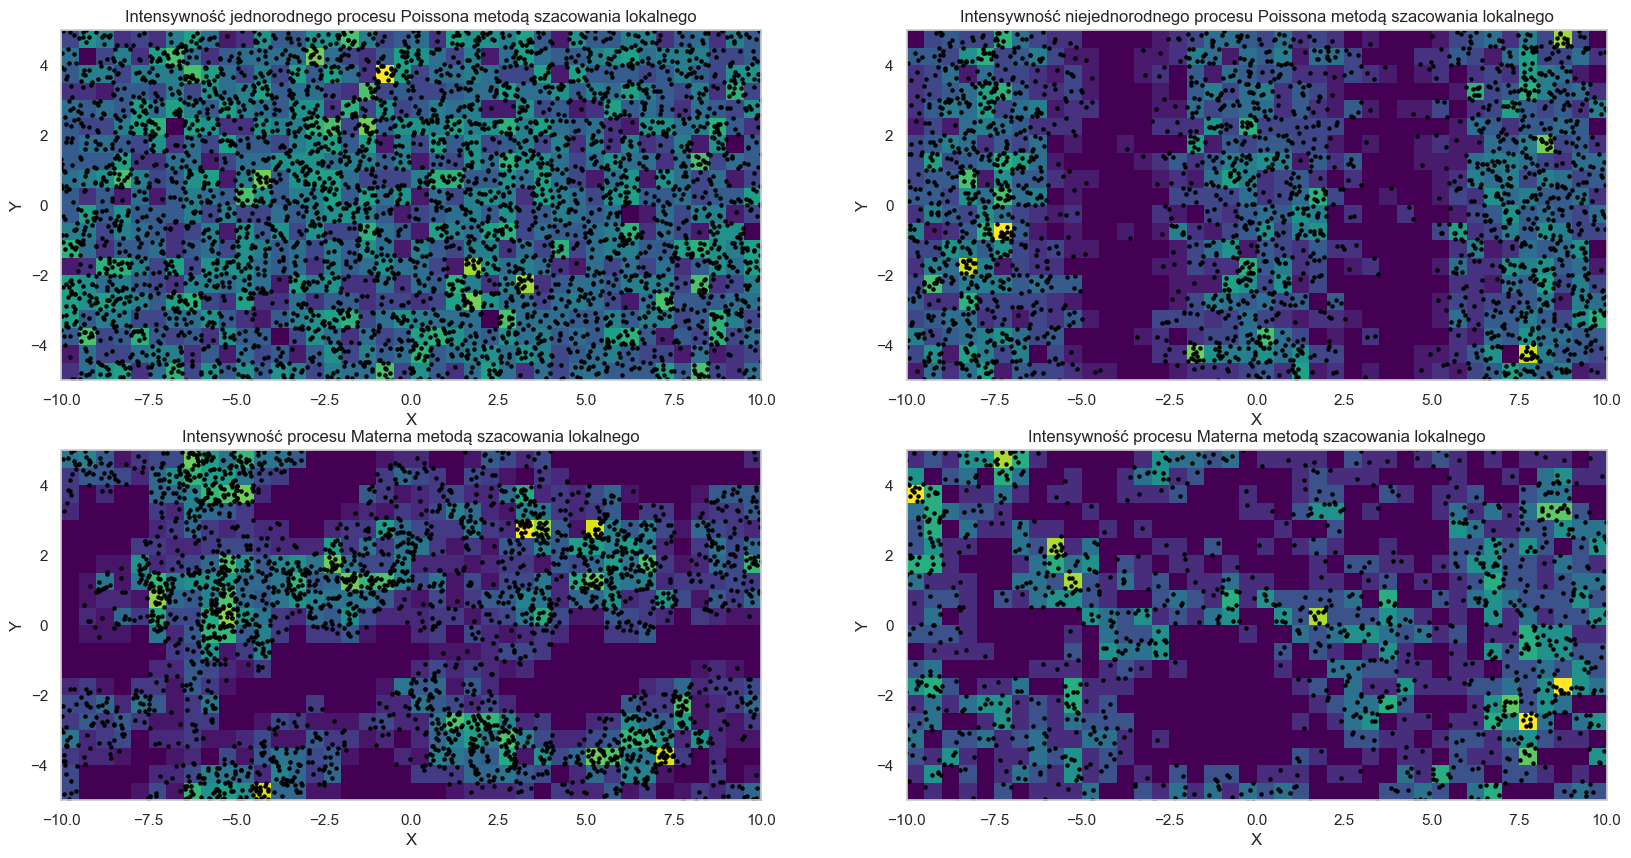

In [27]:
# YOUR CODE HERE
fig,axs=plt.subplots(2,2,figsize=(20,10))
axs[0,0].pcolormesh(innensity_p[0],innensity_p[1],innensity_p[2],cmap="viridis")
axs[0,1].pcolormesh(innensity_unhp[0],innensity_unhp[1],innensity_unhp[2],cmap="viridis")
axs[1,0].pcolormesh(innensity_m[0],innensity_m[1],innensity_m[2],cmap="viridis")
axs[1,1].pcolormesh(innensity_t[0],innensity_t[1],innensity_t[2],cmap="viridis")

axs[0,0].scatter(poisson["X"],poisson["Y"],s=5,c="black")
axs[0,1].scatter(unh_poisson["X"],unh_poisson["Y"],s=5,c="black")
axs[1,0].scatter(materna["X"],materna["Y"],s=5,c="black")
axs[1,1].scatter(thomas["X"],thomas["Y"],s=5,c="black")

axs[0,0].axis("square")
axs[0,0].set_xlim(-10,10)
axs[0,0].set_ylim(-5,5)
axs[0,0].set_title("Intensywność jednorodnego procesu Poissona metodą szacowania lokalnego")
axs[0,0].set_xlabel("X")
axs[0,0].set_ylabel("Y")

axs[0,1].axis("square")
axs[0,1].set_xlim(-10,10)
axs[0,1].set_ylim(-5,5)
axs[0,1].set_title("Intensywność niejednorodnego procesu Poissona metodą szacowania lokalnego")
axs[0,1].set_xlabel("X")
axs[0,1].set_ylabel("Y")

axs[1,0].axis("square")
axs[1,0].set_xlim(-10,10)
axs[1,0].set_ylim(-5,5)
axs[1,0].set_title("Intensywność procesu Materna metodą szacowania lokalnego")
axs[1,0].set_xlabel("X")
axs[1,0].set_ylabel("Y")

axs[1,1].axis("square")
axs[1,1].set_xlim(-10,10)
axs[1,1].set_ylim(-5,5)
axs[1,1].set_title("Intensywność procesu Materna metodą szacowania lokalnego")
axs[1,1].set_xlabel("X")
axs[1,1].set_ylabel("Y")

#raise NotImplementedError()

#pp.histogramid
#pltpcolourmesh

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [31]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):

        
    
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    
    x_grid = np.linspace(x_lim[0], x_lim[1], grid[0])
    y_grid = np.linspace(y_lim[0], y_lim[1], grid[1])

    x_grid, y_grid = np.meshgrid(x_grid, y_grid)
    
    x_grid = x_grid.flatten()
    y_grid = y_grid.flatten()
    
    sum_matrix = np.zeros_like(x_grid)
    
    for i in range(len(x_grid)):
        length = ((x_grid[i]-points['X'])**2+(y_grid[i]-points['Y'])**2)**(1/2)   
        sum_matrix[i] = np.sum(3/(np.pi*kernel_radius**2)*(1-(length[length<=kernel_radius]**2/kernel_radius**2))**2)
        
    array = pd.DataFrame(data={"X":x_grid, "Y":y_grid, "I":sum_matrix})
    return array    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [32]:
# YOUR CODE HERE
kernel_p = intensity_on_kde(poisson, 1.5, [200,100], [-10, 10], [-5,5])
kernel_unhp = intensity_on_kde(unh_poisson, 1.5, [200,100], [-10, 10], [-5,5])
kernel_m = intensity_on_kde(materna, 1.5, [200,100], [-10, 10], [-5,5])
kernel_t = intensity_on_kde(thomas, 1.5, [200,100], [-10, 10], [-5,5])

#raise NotImplementedError()

#### c) Wizualizacja

Text(0, 0.5, 'Y')

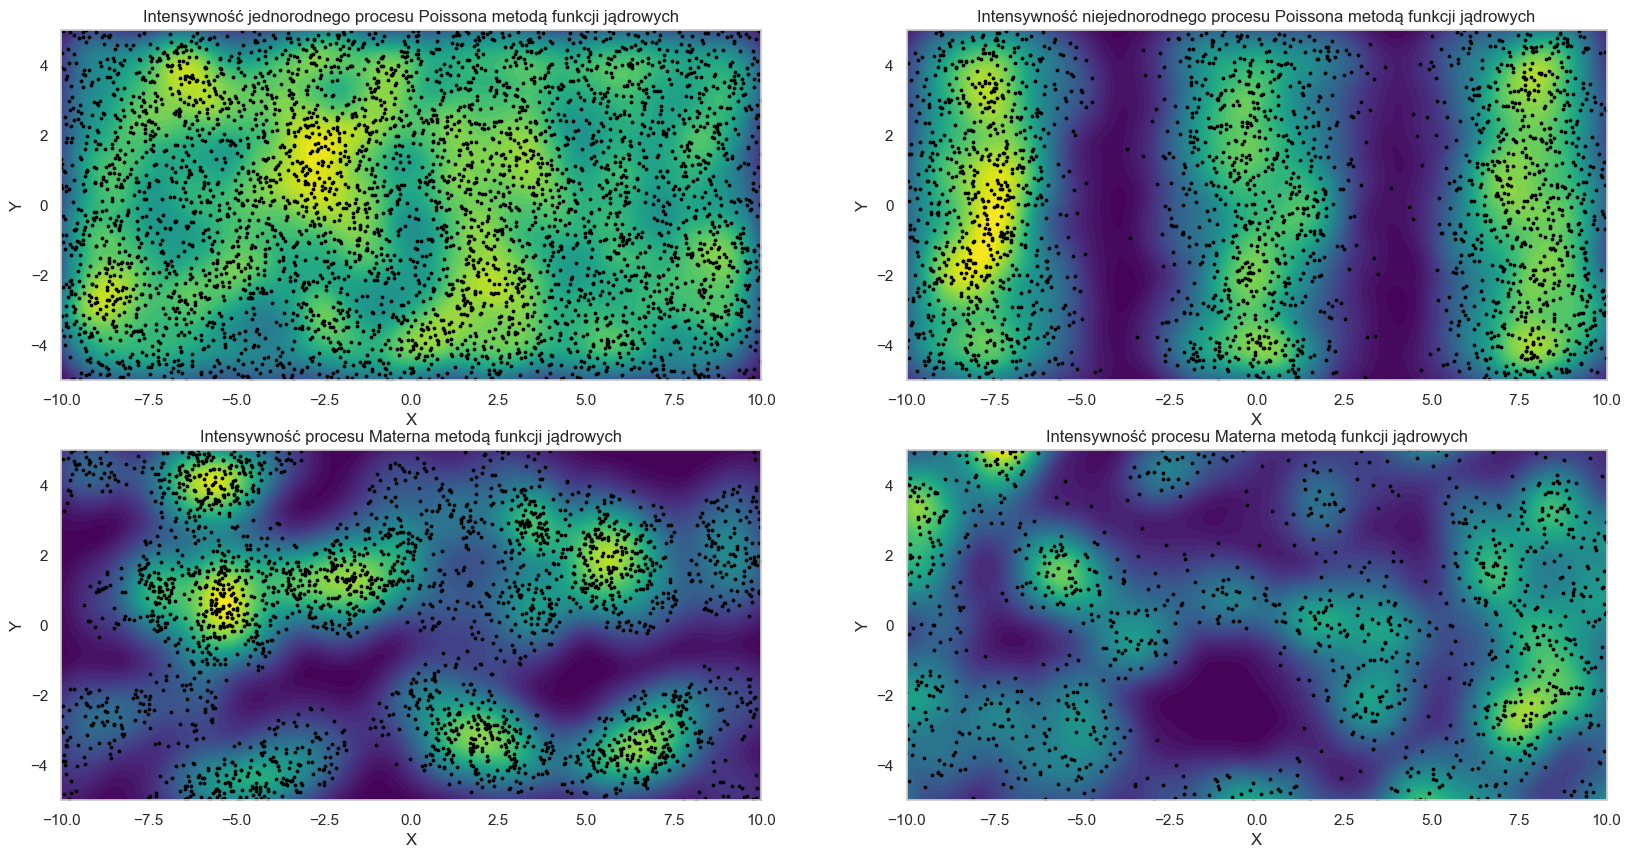

In [33]:
# YOUR CODE HERE
fig,axs=plt.subplots(2,2,figsize=(20,10))
axs[0,0].tricontourf(kernel_p["X"],kernel_p["Y"],kernel_p["I"],cmap="viridis",levels=50)
axs[0,1].tricontourf(kernel_unhp["X"],kernel_unhp["Y"],kernel_unhp["I"],cmap="viridis",levels=50)
axs[1,0].tricontourf(kernel_m["X"],kernel_m["Y"],kernel_m["I"],cmap="viridis",levels=50)
axs[1,1].tricontourf(kernel_t["X"],kernel_t["Y"],kernel_t["I"],cmap="viridis",levels=50)

axs[0,0].scatter(poisson["X"],poisson["Y"],s=3,c="black")
axs[0,1].scatter(unh_poisson["X"],unh_poisson["Y"],s=3,c="black")
axs[1,0].scatter(materna["X"],materna["Y"],s=3,c="black")
axs[1,1].scatter(thomas["X"],thomas["Y"],s=3,c="black")

axs[0,0].axis("square")
axs[0,0].set_xlim(-10,10)
axs[0,0].set_ylim(-5,5)
axs[0,0].set_title("Intensywność jednorodnego procesu Poissona metodą funkcji jądrowych")
axs[0,0].set_xlabel("X")
axs[0,0].set_ylabel("Y")

axs[0,1].axis("square")
axs[0,1].set_xlim(-10,10)
axs[0,1].set_ylim(-5,5)
axs[0,1].set_title("Intensywność niejednorodnego procesu Poissona metodą funkcji jądrowych")
axs[0,1].set_xlabel("X")
axs[0,1].set_ylabel("Y")

axs[1,0].axis("square")
axs[1,0].set_xlim(-10,10)
axs[1,0].set_ylim(-5,5)
axs[1,0].set_title("Intensywność procesu Materna metodą funkcji jądrowych")
axs[1,0].set_xlabel("X")
axs[1,0].set_ylabel("Y")

axs[1,1].axis("square")
axs[1,1].set_xlim(-10,10)
axs[1,1].set_ylim(-5,5)
axs[1,1].set_title("Intensywność procesu Materna metodą funkcji jądrowych")
axs[1,1].set_xlabel("X")
axs[1,1].set_ylabel("Y")
#raise NotImplementedError()